In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
import geopandas as gpd
import pycountry
import warnings
warnings.filterwarnings("ignore")

In [80]:
df = pd.read_csv('tsunamis-2023-09-11_22-13-51_ 0530 (2).csv')

In [81]:
df.head()

,Sr.no,Year,Mo,Dy,Hr,Mn,Sec,TsunamiNanEventNanValidity,TsunamiNanCauseNanCode,EarthquakeNanMagnitude,...,TotalNanMissing,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription
0,1,1900,1.0,10.0,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1900,8.0,11.0,4.0,40.0,NaN,4,3,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,1900,9.0,10.0,21.0,30.0,NaN,4,1,6.8,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,4,1900,9.0,17.0,21.0,45.0,NaN,3,1,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1900,10.0,7.0,21.0,4.0,NaN,3,1,6.9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN


In [132]:
# Fixing Country Names
df['Country'] = df['Country'].str.replace(r'Nan', ' ', regex=True)
df['Country'] = df['Country'].str.title()
df.Country.unique()

array(['Indonesia', 'Usa', 'Papua New Guinea', 'Venezuela', 'Bulgaria',
       'Japan', 'New Caledonia', 'Philippines', 'Nicaragua', 'Guatemala',
       'El Salvador', 'Martinique (French Territory)',
       'Saint Vincent And The Grenadines', 'Greece', 'Mexico',
       'Usa Territory', 'Italy', 'Taiwan', 'Chile', 'Canada', 'Colombia',
       'Russia', 'New Zealand', 'Panama', 'Cook Islands', 'Norway',
       'Costa Rica', 'Vanuatu', 'India', 'Samoa', 'Georgia', 'Tunisia',
       'Togo', 'Ecuador', 'Marshall Islands, Rep. Of', 'Ghana', 'Peru',
       'Jamaica', 'Tonga', 'Ukraine', 'Albania', 'Trinidad And Tobago',
       'Turkey', 'Micronesia, Fed. States Of', 'Dominican Republic',
       'China', 'French Polynesia', 'Iceland', 'Australia', 'Korea',
       'Vietnam', 'Solomon Islands', 'Uk', 'South Korea', 'Portugal',
       'Israel', 'Spain', 'Myanmar (Burma)', 'Kenya', 'Cuba', 'Nepal',
       'Pakistan', 'Nauru', 'Congo', 'Grenada', 'Cyprus',
       'Atlantic Ocean', 'Greenland', 'Fi

In [133]:
# Finding the count of the number of countries in our dataset
len(df.Country.unique())

95

In [134]:
# Gathering Country Code for Each Country
codes = []

for country in df['Country']:
    country_code = pycountry.countries.get(name=country)
    if country == 'Usa':
        codes.append('USA')
    elif country_code == 'Uk':
        codes.append('GBR')
    elif country_code is None:
        codes.append(None)
    else:
        codes.append(country_code.alpha_3)
    
df['Code'] = codes

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sr.no                                     1443 non-null   int64  
 1   Year                                      1443 non-null   int64  
 2   Mo                                        1431 non-null   float64
 3   Dy                                        1409 non-null   float64
 4   Hr                                        1132 non-null   float64
 5   Mn                                        1119 non-null   float64
 6   Sec                                       964 non-null    float64
 7   TsunamiNanEventNanValidity                1443 non-null   int64  
 8   TsunamiNanCauseNanCode                    1443 non-null   int64  
 9   EarthquakeNanMagnitude                    1057 non-null   float64
 10  Vol                                 

In [136]:
df.describe()

,Sr.no,Year,Mo,Dy,Hr,Mn,Sec,TsunamiNanEventNanValidity,TsunamiNanCauseNanCode,EarthquakeNanMagnitude,...,TotalNanMissing,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription
count,1443.000000,1443.000000,1431.000000,1409.000000,1132.000000,1119.000000,964.000000,1443.000000,1443.000000,1057.000000,...,9.000000,10.000000,279.000000,318.000000,153.000000,692.000000,1.660000e+02,345.000000,8.500000e+01,180.000000
mean,722.000000,1963.257103,6.568833,15.557133,11.200530,28.544236,26.870851,2.826750,2.188496,7.015894,...,5051.111111,2.100000,5681.953405,2.223270,4614.426281,2.114162,5.246927e+04,2.614493,4.739454e+04,2.444444
std,416.702532,37.321239,3.457329,8.629267,7.045857,17.334176,17.989602,1.476277,2.578414,0.768837,...,14412.461279,1.197219,31484.588895,1.141624,22053.811540,1.103855,4.214487e+05,1.099323,1.742494e+05,1.201592
min,1.000000,1900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,3.700000,...,1.000000,1.000000,1.000000,1.000000,0.003000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,361.500000,1929.000000,4.000000,8.000000,5.000000,14.000000,10.900000,2.000000,1.000000,6.600000,...,10.000000,1.000000,16.000000,1.000000,3.000000,1.000000,4.025000e+01,2.000000,1.820000e+02,1.000000
50%,722.000000,1964.000000,7.000000,16.000000,11.000000,28.000000,26.000000,4.000000,1.000000,7.100000,...,138.000000,2.000000,100.000000,2.000000,50.000000,2.000000,7.485000e+02,3.000000,1.390000e+03,3.000000
75%,1082.500000,1996.000000,10.000000,23.000000,17.000000,43.000000,42.300000,4.000000,1.000000,7.600000,...,667.000000,3.000000,499.000000,3.000000,600.000000,3.000000,5.154750e+03,3.000000,1.671200e+04,4.000000
max,1443.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.900000,4.000000,10.000000,9.500000,...,43476.000000,4.000000,374171.000000,4.000000,220136.600000,4.000000,5.360000e+06,4.000000,1.474182e+06,4.000000


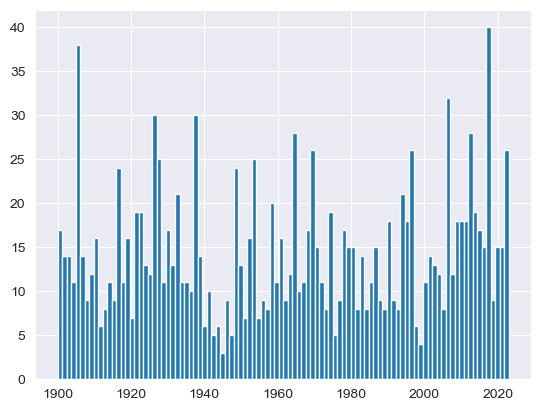

In [137]:
# Looking at the number of tsunamis by year
df['Year'].hist(bins=100);

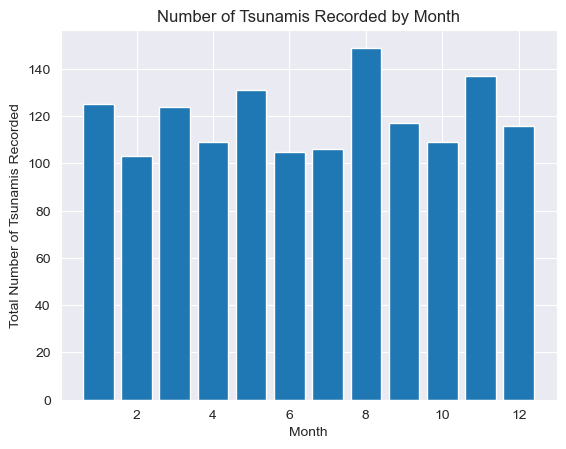

In [138]:
# Analyzing if there are any trends of tsunamis by month
month_df = df[['Sr.no', 'Mo']].dropna()
month_df = month_df.groupby(['Mo'])['Sr.no'].count()
month_df = pd.DataFrame(month_df)
month_df = month_df.reset_index()

plt.bar(month_df['Mo'], month_df['Sr.no'])
plt.xlabel("Month")
plt.ylabel("Total Number of Tsunamis Recorded")
plt.title("Number of Tsunamis Recorded by Month");

In [139]:
# Looking at the median 'Tsunami Intensity' within the data set
df['TsunamiNanIntensity'].median()

1.0

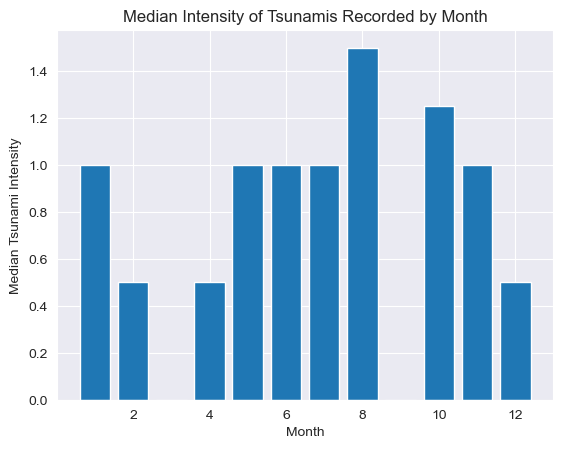

In [140]:
# Inspecting correlation between tsunami strength on average and month
intensity_df = df[['TsunamiNanIntensity', 'Mo']].dropna()
intensity_df = intensity_df.groupby(['Mo'])['TsunamiNanIntensity'].median()
intensity_df = pd.DataFrame(intensity_df)
intensity_df = intensity_df.reset_index()

plt.bar(intensity_df['Mo'], intensity_df['TsunamiNanIntensity'])
plt.xlabel("Month")
plt.ylabel("Median Tsunami Intensity")
plt.title("Median Intensity of Tsunamis Recorded by Month");

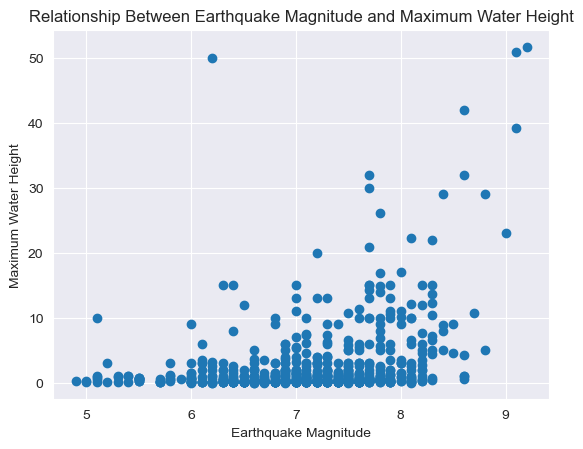

In [141]:
# Plotting the relationship between Earthquake Magnitude and Tsunami Wave Height
height_df = df[['EarthquakeNanMagnitude', 'MaximumNanWaterNanHeightNan(m)']].dropna()

# Removing Outliers in Dataset
height_df = height_df[(np.abs(stats.zscore(height_df)) < 3).all(axis=1)]

plt.scatter(height_df['EarthquakeNanMagnitude'], height_df['MaximumNanWaterNanHeightNan(m)'])
plt.xlabel("Earthquake Magnitude")
plt.ylabel("Maximum Water Height")
plt.title("Relationship Between Earthquake Magnitude and Maximum Water Height");

In [142]:
# Finding the correlation coefficient of Earthquake Magnitude and Tsunami Wave Height
height_df.corr()

,EarthquakeNanMagnitude,MaximumNanWaterNanHeightNan(m)
EarthquakeNanMagnitude,1.000000,0.328421
MaximumNanWaterNanHeightNan(m),0.328421,1.000000


In [143]:
# Creating Dataset Grouped By Country


In [144]:
# Load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [145]:
# Merge the world shapefile with your dataset based on the country code
merged = world.merge(df, left_on='name', right_on='Country', how = 'left' )
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Sr.no,Year,Mo,Dy,...,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription,Code
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",612.0,1953.0,9.0,14.0,...,NaN,12.0,1.0,NaN,2.0,NaN,2.0,NaN,1.0,FJI
1,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",858.0,1975.0,12.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FJI
2,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",904.0,1979.0,11.0,16.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,FJI
3,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1339.0,2017.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FJI
4,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1369.0,2018.0,8.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FJI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",895.0,1979.0,4.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MNE
1257,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",896.0,1979.0,4.0,15.0,...,NaN,1001.0,4.0,2700.0,4.0,NaN,4.0,NaN,NaN,MNE
1258,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
code_df = df.groupby('Code')['Sr.no'].count()

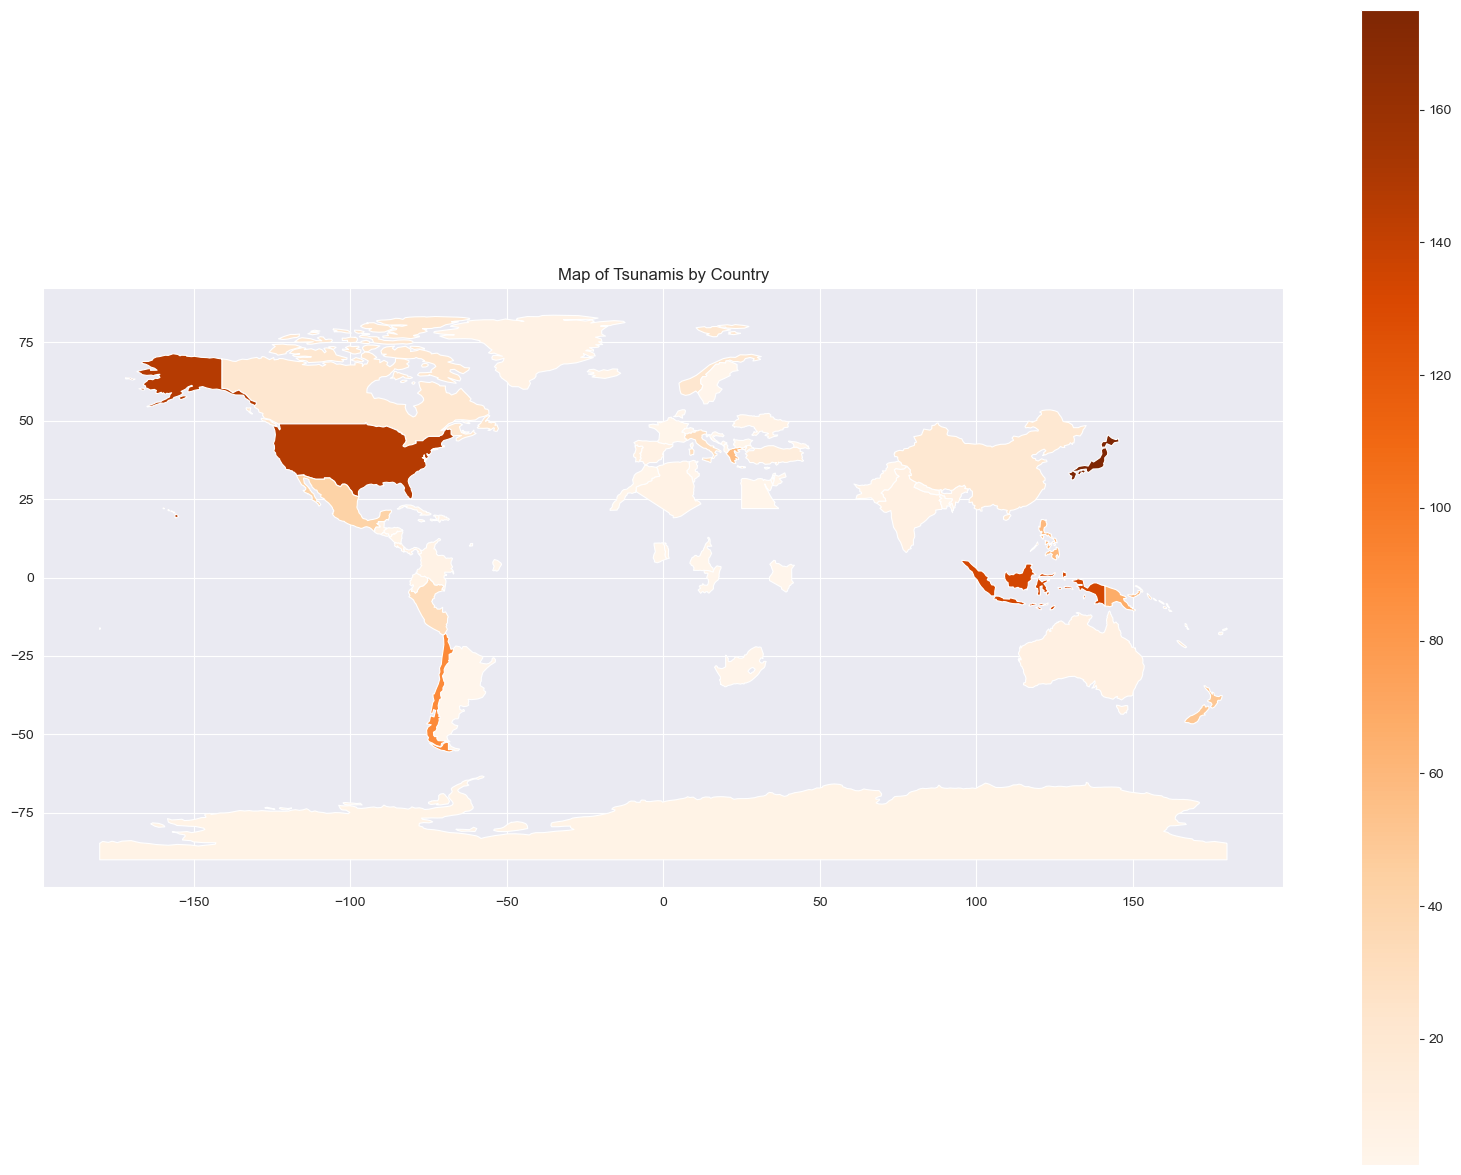

In [150]:
# Load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with your dataset based on the country code
merged = world.merge(code_df, left_on='iso_a3', right_on='Code', how = 'left' )

# Select the feature column you want to visualize
feature_column = 'Sr.no'

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(20, 15))
merged.plot(column=feature_column, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='white', legend=True)
ax.set_title('Map of Tsunamis by Country')
plt.show();